<a href="https://colab.research.google.com/github/BorisLoveDev/don-t_know-s_agents/blob/main/augmentator_by_V_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import os
from tqdm.notebook import tqdm
from google.colab import drive
from sklearn.utils import shuffle


In [2]:

# Монтирование Google Drive
drive.mount('/content/drive')

# Путь к папке для загрузки данных
data_path = '/content/drive/My Drive/solo_research_aug_cnn/datasets'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Загрузка сохраненных данных
x_train_new = np.load(os.path.join(data_path, 'x_train_new.npy'))
y_train_new = np.load(os.path.join(data_path, 'y_train_new.npy'))
x_val = np.load(os.path.join(data_path, 'x_val.npy'))
y_val = np.load(os.path.join(data_path, 'y_val.npy'))
x_test = np.load(os.path.join(data_path, 'x_test.npy'))
y_test = np.load(os.path.join(data_path, 'y_test.npy'))

# Перемешивание данных
x_val, y_val = shuffle(x_val, y_val, random_state=42)
# Остальные данные уже перемешенные

# Применение one-hot encoding к меткам
# y_train_new_ohe = to_categorical(y_train_new, 10)
# y_val_ohe = to_categorical(y_val, 10)
# y_test_ohe = to_categorical(y_test, 10)

print("Data loaded and one-hot encoded successfully.")

Data loaded and one-hot encoded successfully.


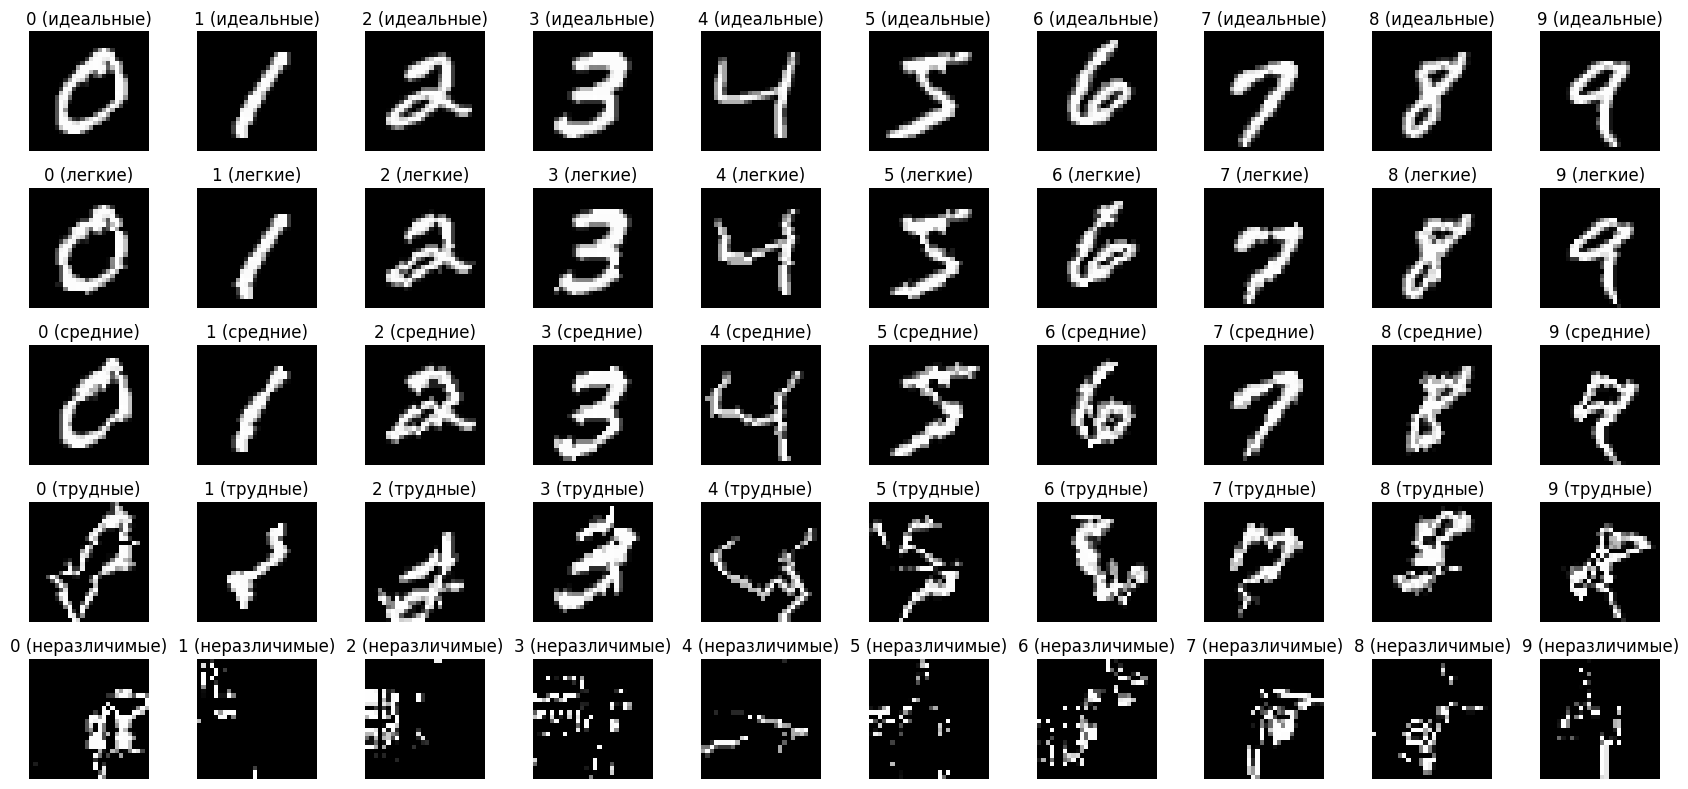

In [4]:

# Загрузка данных MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Функция для деформации изображения
def deform_image(image, A, B, M=100, NP=5):
    C = M / (NP + 1.0)
    SS = np.zeros((M, M))
    XN, YN, DX, DY = np.zeros(M), np.zeros(M), np.linspace(0, M-1, M), np.linspace(0, M-1, M)

    # Вычисление деформирующих векторов
    for j in range(NP):
        TXN = (j + 0.5 - np.random.random()) * C
        TYN = (j + 0.5 - np.random.random()) * C
        TDX = (j + 0.5 - np.random.random()) * C
        TDY = (j + 0.5 - np.random.random()) * C
        AXN = B * (1.0 - 2.0 * np.random.random())
        AYN = B * (1.0 - 2.0 * np.random.random())
        ADX = A * (1.0 - 2.0 * np.random.random())
        ADY = A * (1.0 - 2.0 * np.random.random())
        PXN = (0.1 + 0.9 * np.random.random()) * C
        PYN = (0.1 + 0.9 * np.random.random()) * C
        PDX = (0.1 + 0.9 * np.random.random()) * C
        PDY = (0.1 + 0.9 * np.random.random()) * C

        DX += ADX * np.exp(-np.square((np.linspace(0, M-1, M) - TDX) / PDX))
        DY += ADY * np.exp(-np.square((np.linspace(0, M-1, M) - TDY) / PDY))
        XN += AXN * np.exp(-np.square((np.linspace(0, M-1, M) - TXN) / PXN))
        YN += AYN * np.exp(-np.square((np.linspace(0, M-1, M) - TYN) / PYN))

    # Применение деформации к изображению
    deformed_image = np.zeros((M, M))
    for j in range(M):
        for i in range(M):
            x_index = int(DX[i] + XN[j])
            y_index = int(DY[j] + YN[i])
            if 0 <= x_index < M and 0 <= y_index < M:
                deformed_image[j, i] = image[y_index, x_index] if y_index < image.shape[0] and x_index < image.shape[1] else 0
    return deformed_image

import numpy as np

def deform_image_optimized(image, A, B, M=100, NP=5):
    C = M / (NP + 1.0)
    SS = np.zeros((M, M))
    XN, YN = np.zeros(M), np.zeros(M)
    DX, DY = np.linspace(0, M-1, M), np.linspace(0, M-1, M)

    for j in range(NP):
        TXN = (j + 0.5 - np.random.random()) * C
        TYN = (j + 0.5 - np.random.random()) * C
        TDX = (j + 0.5 - np.random.random()) * C
        TDY = (j + 0.5 - np.random.random()) * C
        AXN = B * (1.0 - 2.0 * np.random.random())
        AYN = B * (1.0 - 2.0 * np.random.random())
        ADX = A * (1.0 - 2.0 * np.random.random())
        ADY = A * (1.0 - 2.0 * np.random.random())
        PXN = (0.1 + 0.9 * np.random.random()) * C
        PYN = (0.1 + 0.9 * np.random.random()) * C
        PDX = (0.1 + 0.9 * np.random.random()) * C
        PDY = (0.1 + 0.9 * np.random.random()) * C

        DX += ADX * np.exp(-((DX - TDX) / PDX)**2)
        DY += ADY * np.exp(-((DY - TDY) / PDY)**2)
        XN += AXN * np.exp(-((DX - TXN) / PXN)**2)
        YN += AYN * np.exp(-((DY - TYN) / PYN)**2)

    # Применение деформации к изображению
    deformed_image = np.zeros((M, M))
    for j in range(M):
        for i in range(M):
            x_index = int(DX[i] + XN[j])
            y_index = int(DY[j] + YN[i])
            if 0 <= x_index < M and 0 <= y_index < M:
                deformed_image[j, i] = image[y_index, x_index] if y_index < image.shape[0] and x_index < image.shape[1] else 0

    return deformed_image


# Параметры деформации для разных уровней сложности
deform_params = {
    "идеальные": (0, 0),
    "легкие": (0.2, 1.0),
    "средние": (0.4, 2.0),
    "трудные": (0.8, 6.0),
    "неразличимые": (10.0, 30.0)
}

# Генерация и отображение деформированных изображений
plt.figure(figsize=(17, 8))
for i, (label, params) in enumerate(deform_params.items()):
    A, B = params
    for digit in range(10):
        idx = np.where(y_train == digit)[0][0]
        image = x_train[idx]
        deformed_image = deform_image_optimized(image, A, B, M=28, NP=5)  # Изменение размера M для соответствия размеру изображения MNIST
        plt.subplot(5, 10, i * 10 + digit + 1)
        plt.imshow(deformed_image, cmap='gray')
        plt.title(f"{digit} ({label})")
        plt.axis('off')

plt.tight_layout()
plt.show()


In [7]:
# Параметры деформации (исключаем "идеальные")
deform_params_eng = {
    "easy": (0.2, 1.0),
    "medium": (0.4, 2.0),
    "hard": (0.8, 6.0),
    "indistinguishable": (10.0, 30.0)
}

# Обработка и сохранение деформированных изображений для каждого уровня сложности
for label, (A, B) in deform_params_eng.items():
    x_val_deformed = np.zeros((x_val.shape[0], 28, 28, 1))  # Создаем массив подходящего размера

    # Применяем деформацию к каждому изображению
    for i in tqdm(range(len(x_val)), desc=f"Processing {label}"):
        deformed_image = deform_image_optimized(x_val[i, :, :, 0], A, B, M=28, NP=5)
        x_val_deformed[i] = np.expand_dims(deformed_image, axis=-1)  # Добавляем измерение канала

    # Сохраняем деформированные изображения
    np.save(os.path.join(data_path, f'x_val_{label}.npy'), x_val_deformed)
    print(f"Dataset '{label}' saved to {data_path}/x_val_{label}.npy")

Processing easy:   0%|          | 0/10000 [00:00<?, ?it/s]

Dataset 'easy' saved to /content/drive/My Drive/solo_research_aug_cnn/datasets/x_val_easy.npy


Processing medium:   0%|          | 0/10000 [00:00<?, ?it/s]

Dataset 'medium' saved to /content/drive/My Drive/solo_research_aug_cnn/datasets/x_val_medium.npy


Processing hard:   0%|          | 0/10000 [00:00<?, ?it/s]

Dataset 'hard' saved to /content/drive/My Drive/solo_research_aug_cnn/datasets/x_val_hard.npy


Processing indistinguishable:   0%|          | 0/10000 [00:00<?, ?it/s]

Dataset 'indistinguishable' saved to /content/drive/My Drive/solo_research_aug_cnn/datasets/x_val_indistinguishable.npy
